In [30]:
# Install required libraries
!pip install pandas scipy scikit-learn seaborn matplotlib

# Import required libraries
import pandas as pd
from IPython.display import display
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.io import arff
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [31]:
import pandas as pd

# Load each dataset with specified encoding
test_df = pd.read_csv('/content/test.csv', encoding='ISO-8859-1')
testdata_manual_df = pd.read_csv('/content/testdata.manual.2009.06.14.csv', encoding='ISO-8859-1', header=None)
train_df = pd.read_csv('/content/train.csv', encoding='ISO-8859-1')

# Load the fourth dataset with known structure
column_names = ['polarity', 'id', 'date', 'query', 'user', 'text']
training_large_df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=column_names)

# Standardize test.csv - selecting necessary columns
test_df = test_df[['text', 'sentiment']]

# Standardize testdata.manual.2009.06.14.csv
testdata_manual_df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']
testdata_manual_df['sentiment'] = testdata_manual_df['polarity'].apply(lambda x: 'negative' if x == 0 else 'positive')
testdata_manual_df = testdata_manual_df[['text', 'sentiment']]

# Standardize train.csv - assuming it includes text and sentiment columns
train_df = train_df[['text', 'sentiment']]

# Standardize training.1600000.processed.noemoticon dataset
training_large_df['sentiment'] = training_large_df['polarity'].apply(lambda x: 'negative' if x == 0 else 'positive')
training_large_df = training_large_df[['text', 'sentiment']]

# Combine all datasets into one DataFrame
all_data = pd.concat([test_df, train_df, testdata_manual_df, training_large_df], ignore_index=True)

# Save the combined dataset to a new CSV file for later use
all_data.to_csv('/content/combined_tweet_data.csv', index=False)
print("\nCombined dataset saved as 'combined_tweet_data.csv'")

df = pd.read_csv('/content/combined_tweet_data.csv')
# Descriptive statistics
df.describe()


Combined dataset saved as 'combined_tweet_data.csv'


,text,sentiment
count,1080103,1080104
unique,1065346,3
top,isPlayer Has Died! Sorry,negative
freq,210,677885


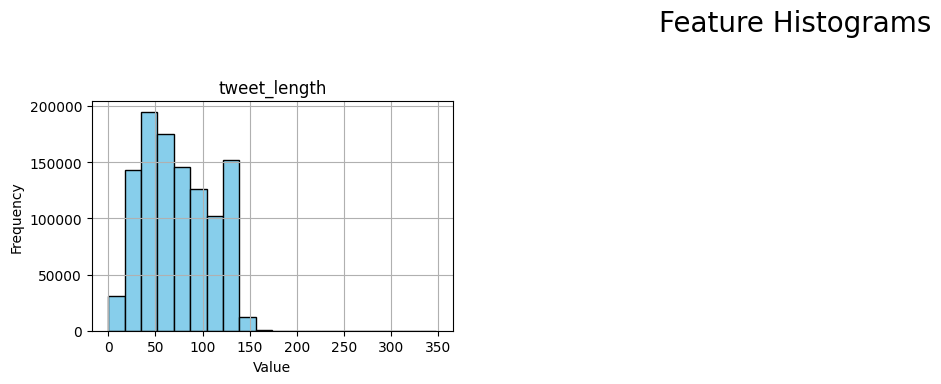

In [32]:
import pandas as pd
import math
import matplotlib.pyplot as plt

# Load the tweet dataset
df = pd.read_csv('/content/combined_tweet_data.csv')

# Ensure that all values in the 'text' column are strings and handle NaN
df['text'] = df['text'].fillna('')  # Replace NaN with an empty string
df['text'] = df['text'].astype(str)  # Ensure all values are strings

# Add a new column for tweet length (number of characters)
df['tweet_length'] = df['text'].apply(len)

# Number of numeric features (e.g., tweet length)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns  # Identify numeric columns
num_features = len(numeric_columns)
num_cols = 4  # Number of columns for the grid
num_rows = math.ceil(num_features / num_cols)  # Calculate rows needed for subplots

# Set up the grid for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

# Check if axes is 1D and reshape it for correct indexing
if num_rows == 1:
    axes = axes.reshape(1, num_cols)  # Convert to 2D array for uniform indexing
else:
    axes = axes.reshape(num_rows, num_cols)  # Ensure 2D layout

# Left-align the suptitle
fig.suptitle("Feature Histograms", fontsize=20)

# Plot each numeric feature in a separate subplot
for i, feature in enumerate(numeric_columns):
    row, col = divmod(i, num_cols)
    df[feature].hist(bins=20, ax=axes[row, col], color='skyblue', edgecolor='black')
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel("Value")
    axes[row, col].set_ylabel("Frequency")

# Adjust layout and remove extra subplots
for j in range(i + 1, num_rows * num_cols):
    row, col = divmod(j, num_cols)
    fig.delaxes(axes[row, col])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()


Class Balance (Sentiment Distribution):
sentiment
negative    677885
positive    389671
neutral      12548


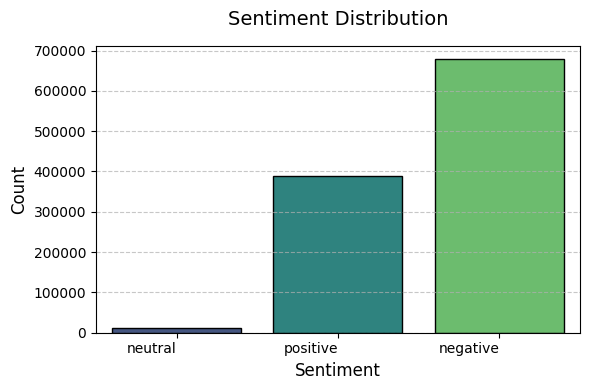

In [33]:
# Load the tweet dataset
df = pd.read_csv('/content/combined_tweet_data.csv')

# Check class balance in the 'sentiment' column and print it without dtype
print("Class Balance (Sentiment Distribution):")
print(df['sentiment'].value_counts().to_string())  # This removes the dtype information

# Visualize class balance with a countplot
plt.figure(figsize=(6, 4))  # Adjust figure size
sns.countplot(data=df, x='sentiment', palette="viridis", edgecolor='black')  # Edge color for visual clarity

# Title and labels
plt.title("Sentiment Distribution", fontsize=14, pad=15)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adjusting ticks and adding a light grid for readability
plt.xticks(fontsize=10, rotation=0, ha='right')
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add light grid on the y-axis

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


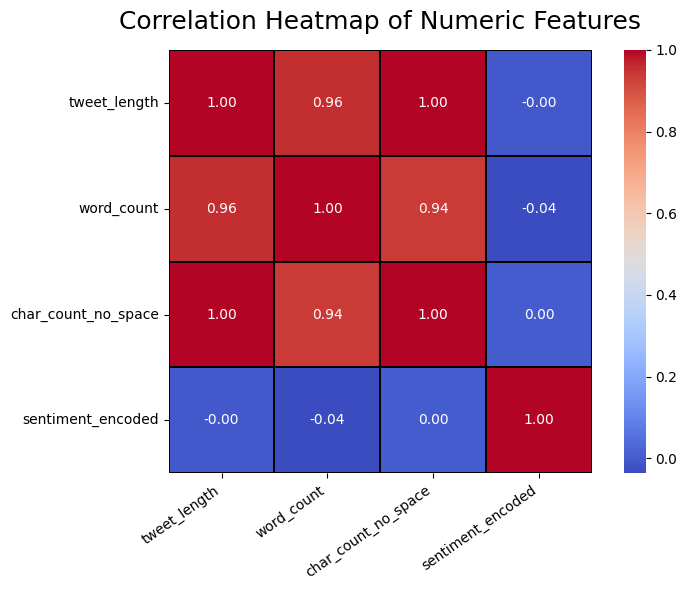

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tweet dataset
df = pd.read_csv('/content/combined_tweet_data.csv')

# Add numeric features based on the text data
df['tweet_length'] = df['text'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)  # Tweet length
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)  # Word count
df['char_count_no_space'] = df['text'].apply(lambda x: len(str(x).replace(" ", "")) if isinstance(x, str) else 0)  # Character count without spaces

# Encode the 'sentiment' column to numeric (optional)
df['sentiment_encoded'] = df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Select only numeric columns for the correlation calculation
numeric_df = df[['tweet_length', 'word_count', 'char_count_no_space', 'sentiment_encoded']]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a heatmap with improved aesthetics
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True,
            linewidths=0.3, linecolor='black', annot_kws={"size": 10})

# Title and other aesthetics
plt.title("Correlation Heatmap of Numeric Features", fontsize=18, pad=15)
plt.xticks(rotation=35, fontsize=10, ha='right')
plt.yticks(rotation=0, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [35]:
import pandas as pd

# Load the tweet dataset
df = pd.read_csv('/content/combined_tweet_data.csv')

# Add a new column for tweet length (number of characters)
df['tweet_length'] = df['text'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)

# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Print the missing values for each column (without dtype)
print("Missing Values Per Feature:")
print(missing_values.to_string())

# Handle missing values for 'text' and 'sentiment'
# For text: Fill missing 'text' with an empty string
df['text'] = df['text'].fillna('')

# For sentiment: Fill missing 'sentiment' with 'neutral'
df['sentiment'] = df['sentiment'].fillna('neutral')

# For numeric columns like 'tweet_length', fill missing values with median
df['tweet_length'] = df['tweet_length'].fillna(df['tweet_length'].median())

# Check again after filling
missing_values_after = df.isnull().sum()

# Print missing values after handling (without dtype)
print("\nMissing Values After Handling:")
print(missing_values_after.to_string())

# Save the cleaned DataFrame to a new CSV file
df.to_csv('/content/cleaned_tweet_data.csv', index=False)

# Now df is cleaned and saved as 'cleaned_tweet_data.csv'
print("\nCleaned data saved as 'cleaned_tweet_data.csv'.")


Missing Values Per Feature:
text            1282
sentiment       1281
tweet_length       0

Missing Values After Handling:
text            0
sentiment       0
tweet_length    0

Cleaned data saved as 'cleaned_tweet_data.csv'.


In [36]:
import pandas as pd
import numpy as np

# Load the cleaned tweet dataset
df = pd.read_csv('/content/cleaned_tweet_data.csv')

# Function to cap outliers using IQR method
def cap_outliers(df, columns):
    for col in columns:
        # Calculate Q1, Q3 and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers to the bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# Identify numeric columns for outlier treatment
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Apply the outlier capping function
df = cap_outliers(df, numeric_columns)

# Save the DataFrame after outlier treatment (optional)
df.to_csv('/content/cleaned_tweet_data_no_outliers.csv', index=False)

# Load the saved data and display descriptive statistics
dd = pd.read_csv('/content/cleaned_tweet_data_no_outliers.csv')
print("Descriptive Statistics After Outlier Capping:")
print(dd.describe())

# Confirm the save
print("\nCleaned data (with capped outliers) saved as 'cleaned_tweet_data_no_outliers.csv'.")


Descriptive Statistics After Outlier Capping:
       tweet_length
count  1.081385e+06
mean   7.403902e+01
std    3.665144e+01
min    0.000000e+00
25%    4.400000e+01
50%    6.900000e+01
75%    1.040000e+02
max    1.940000e+02

Cleaned data (with capped outliers) saved as 'cleaned_tweet_data_no_outliers.csv'.


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the cleaned tweet dataset with capped outliers
df = pd.read_csv('/content/cleaned_tweet_data_no_outliers.csv')

# Identify numeric columns for scaling
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Option 1: Min-Max Scaling (scales features to the range 0-1)
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Option 2: Standard Scaling (standardizes features to have mean=0 and std=1)
# scaler = StandardScaler()
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Save the scaled dataset
df.to_csv('/content/scaled_tweet_data.csv', index=False)

# Display the first 5 rows of the scaled data
print("First 5 rows of the scaled data:")
print(df.head())

# Confirm the save
print("\nScaled data saved as 'scaled_tweet_data.csv'.")


First 5 rows of the scaled data:
                                                text sentiment  tweet_length
0  Last session of the day  http://twitpic.com/67ezh   neutral      0.252577
1   Shanghai is also really exciting (precisely -...  positive      0.530928
2  Recession hit Veronique Branquinho, she has to...  negative      0.402062
3                                        happy bday!  positive      0.061856
4             http://twitpic.com/4w75p - I like it!!  positive      0.201031

Scaled data saved as 'scaled_tweet_data.csv'.


In [40]:
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  # For stemming
from nltk.stem import WordNetLemmatizer  # Optional: For lemmatization
from nltk import download
from tqdm import tqdm  # For progress tracking
nltk.download('punkt_tab')

# Download necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')  # Optional: For lemmatization

# Load the scaled dataset
df = pd.read_csv('/content/scaled_tweet_data.csv')

# Ensure required columns exist
if 'text' not in df.columns:
    raise ValueError("The input CSV file must contain a 'text' column.")

# Function to clean the text (remove URLs, mentions, special characters)
def clean_text(text):
    if not isinstance(text, str):  # Handle non-string cases
        return ''
    # Remove URLs, mentions, and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions (@username)
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    return text

# Fill missing values in 'text' column with empty string before applying cleaning
df['text'] = df['text'].fillna('')

# Apply text cleaning function
df['cleaned_text'] = df['text'].apply(clean_text)

# Tokenization, stopword removal, and stemming
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def tokenize_and_process(text):
    if not isinstance(text, str):  # Ensure input is string
        return ''
    tokens = text.split()  # Use str.split() for faster tokenization
    filtered_tokens = [
        stemmer.stem(word) for word in tokens  # Stemming each token
        if word not in stop_words and word.isalpha()  # Remove stopwords and non-alphabetic tokens
    ]
    return ' '.join(filtered_tokens)

# Apply tokenization and stemming with progress tracking
tqdm.pandas()  # Initialize tqdm for pandas
df['processed_text'] = df['cleaned_text'].progress_apply(tokenize_and_process)

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on VADER compound score
def get_sentiment(text):
    if not isinstance(text, str):  # Ensure text is valid
        return 'neutral'
    score = sia.polarity_scores(text)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
df['sentiment_pred'] = df['processed_text'].progress_apply(get_sentiment)

# Display the first few rows with sentiment labels
print("First 5 rows with predicted sentiment:")
print(df[['text', 'cleaned_text', 'processed_text', 'sentiment_pred']].head())

# Save the updated dataset with sentiment predictions
df.to_csv('/content/tweet_sentiment_predictions.csv', index=False)

print("\nSentiment classification applied and saved as 'tweet_sentiment_predictions.csv'.")



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|██████████| 1081385/1081385 [02:37<00:00, 6850.36it/s]


First 5 rows with predicted sentiment:
                                                text  \
0  Last session of the day  http://twitpic.com/67ezh   
1   Shanghai is also really exciting (precisely -...   
2  Recession hit Veronique Branquinho, she has to...   
3                                        happy bday!   
4             http://twitpic.com/4w75p - I like it!!   

                                        cleaned_text  \
0                          last session of the day     
1   shanghai is also really exciting precisely  s...   
2  recession hit veronique branquinho she has to ...   
3                                         happy bday   
4                                          i like it   

                                      processed_text sentiment_pred  
0                                   last session day        neutral  
1  shanghai also realli excit precis skyscrap gal...       positive  
2  recess hit veroniqu branquinho quit compani shame       negative  
3      

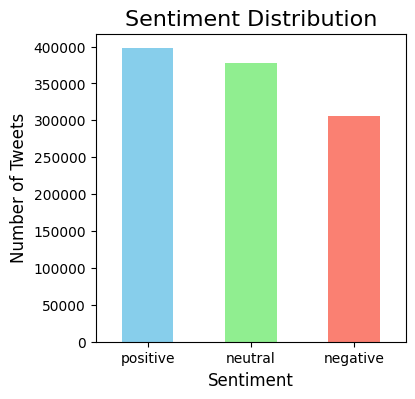

In [41]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with predicted sentiment
df = pd.read_csv('/content/tweet_sentiment_predictions.csv')

# Count the number of occurrences of each sentiment class
sentiment_counts = df['sentiment_pred'].value_counts()

# Plot the sentiment distribution as a bar chart
plt.figure(figsize=(4, 4))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.show()
